# Research Question
Peter Gansallo
Assignment 2

## Does the prevalence of asthma and Chronic Obstructive Pulmonary Disease (COPD) vary by state in the United States, and are diffrences in prevalence by race?

# Data Description:

United States Chronic Disease Indicators (CDI)
Last Updated: March 9, 2024
Source: CDC's Division of Population Health

The U.S. Chronic Disease Indicators dataset provides a set of 115 public health indicators developed through a collaborative effort involving the CDC, the Council of State and Territorial Epidemiologists, and the National Association of Chronic Disease Directors. These indicators enable consistent collection, reporting, and analysis of chronic disease data at the state and territorial levels. The dataset is designed to support public health practice, offering state-specific data while serving as a gateway to additional health-related data and resources.

The dataset is publicly accessible and available in multiple formats, including CSV, RDF, JSON, and XML, and I'll be accessing the CSV dataset that's available.

# Code
## Examine the dataset
Describe Methodology. Load the Dataset, check the data types, see the missing values, drop the columns are empty, make an analysis of the data
### Import libraries

In [354]:
# Import the libraries
import numpy as np                  # Numerical Python
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
#pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [356]:
# Read the dataset
df = pd.read_csv('U.S._Chronic_Disease_Indicators.csv')

## Cleaning And Understanding The Data

In [358]:
# Checking first elements of the DataFrame with `.head( )` method
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2019,US,United States,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",NaN,Number,Number,3009.0,3009.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,59,CAN,CAN02,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,19.3,19.3,NaN,NaN,15.8,23.5,Age,Age 45-64,NaN,NaN,NaN,NaN,POINT (144.793731 13.444304),66,DIA,DIA01,NaN,CRDPREV,AGE,AGE4564,NaN,NaN,NaN,NaN
2,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,10.6,10.6,NaN,NaN,9.1,12.2,Sex,Male,NaN,NaN,NaN,NaN,POINT (-114.3637300419997 43.682630005000476),16,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,MD,Maryland,BRFSS,Mental Health,Depression among adults,NaN,%,Crude Prevalence,12.1,12.1,NaN,NaN,11.0,13.3,Sex,Male,NaN,NaN,NaN,NaN,POINT (-76.60926011099963 39.29058096400047),24,MEN,MEN02,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,MI,Michigan,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,78.0,78.0,NaN,NaN,77.9,78.1,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-84.71439026999968 44.6613195430005),26,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [359]:
# display the dimensions of the data
# This is the number of rows and columns in the data
# Syntax: DataFrame.shape
df.shape

(310480, 34)

In [360]:
# Let's check the basic information about the dataset
# Syntax: DataFrame.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310480 entries, 0 to 310479
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  310480 non-null  int64  
 1   YearEnd                    310480 non-null  int64  
 2   LocationAbbr               310480 non-null  object 
 3   LocationDesc               310480 non-null  object 
 4   DataSource                 310480 non-null  object 
 5   Topic                      310480 non-null  object 
 6   Question                   310480 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              310480 non-null  object 
 9   DataValueType              310480 non-null  object 
 10  DataValue                  209826 non-null  float64
 11  DataValueAlt               209826 non-null  float64
 12  DataValueFootnoteSymbol    102351 non-null  object 
 13  DataValueFootnote          10

In [361]:
#create a function that removes empty columns, and tells us the columns that were empty and removed
def empty_columns(DataFrame):
    for column in DataFrame.columns:
        if len(DataFrame[column].dropna()) == 0:
            #column has only empty rows, so we don't need this column
            DataFrame.drop(columns=[column], inplace=True)
            print(str(column)+ ' was dropped from dataframe because column has only empty rows')
    print("There are " + str(len(DataFrame.columns))+ " to after dropping empty columns")
    return

empty_columns(df)

Response was dropped from dataframe because column has only empty rows
StratificationCategory2 was dropped from dataframe because column has only empty rows
Stratification2 was dropped from dataframe because column has only empty rows
StratificationCategory3 was dropped from dataframe because column has only empty rows
Stratification3 was dropped from dataframe because column has only empty rows
ResponseID was dropped from dataframe because column has only empty rows
StratificationCategoryID2 was dropped from dataframe because column has only empty rows
StratificationID2 was dropped from dataframe because column has only empty rows
StratificationCategoryID3 was dropped from dataframe because column has only empty rows
StratificationID3 was dropped from dataframe because column has only empty rows
There are 24 to after dropping empty columns


In [362]:
#Drop more unnecessary columns
df.drop(columns=['DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit'],inplace=True)


## Filtering and cleaning the Asthma and COPD Data

In [364]:
# Filter for only 'Asthma' and 'Chronic Obstructive Pulmonary Disease' topics
df_filtered_asthma = df[df['Topic'].isin(['Asthma'])]

In [365]:
# Filter for only 'Asthma' and 'Chronic Obstructive Pulmonary Disease' topics
df_filtered_copd = df[df['Topic'].isin(['Chronic Obstructive Pulmonary Disease'])]

In [366]:
# Let's create a function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

def missing(DataFrame):
    print ('Percentage of missing values in the dataset:\n',
           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))


# Call the function and execute
missing(df_filtered_asthma)

Percentage of missing values in the dataset:
 DataValue                    50.23
Geolocation                   1.87
StratificationCategory1       0.00
StratificationCategoryID1     0.00
DataValueTypeID               0.00
QuestionID                    0.00
TopicID                       0.00
LocationID                    0.00
Stratification1               0.00
YearStart                     0.00
YearEnd                       0.00
DataValueType                 0.00
DataValueUnit                 0.00
Question                      0.00
Topic                         0.00
DataSource                    0.00
LocationDesc                  0.00
LocationAbbr                  0.00
StratificationID1             0.00
dtype: float64


In [367]:
missing(df_filtered_copd)

Percentage of missing values in the dataset:
 DataValue                    32.78
Geolocation                   1.89
StratificationCategory1       0.00
StratificationCategoryID1     0.00
DataValueTypeID               0.00
QuestionID                    0.00
TopicID                       0.00
LocationID                    0.00
Stratification1               0.00
YearStart                     0.00
YearEnd                       0.00
DataValueType                 0.00
DataValueUnit                 0.00
Question                      0.00
Topic                         0.00
DataSource                    0.00
LocationDesc                  0.00
LocationAbbr                  0.00
StratificationID1             0.00
dtype: float64


### Filtering and Cleaning Asthma

In [369]:
# Dropping rows with missing geolocation because less than 5% missing
df_filtered_asthma = df_filtered_asthma.dropna(subset=['Geolocation'])

# Filling missing DataValue by group (DataValueUnit and DataValueType) because more than 5% missing
df_filtered_asthma['DataValue'] = df_filtered_asthma.groupby(['DataValueUnit', 'DataValueType'])['DataValue'].transform(lambda x: x.fillna(x.mean()))

In [370]:
# Look at how the data now looks
df_filtered_asthma.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
5,2019,2019,MN,Minnesota,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,8.9,Age,Age 45-64,POINT (-94.79420050299967 46.35564873600049),27,AST,AST02,CRDPREV,AGE,AGE4564
12,2019,2019,NV,Nevada,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,7.1,Sex,Male,POINT (-117.07184056399967 39.493240390000494),32,AST,AST02,CRDPREV,SEX,SEXM
15,2019,2019,NJ,New Jersey,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,66.0,Sex,Female,POINT (-74.27369128799967 40.13057004800049),34,AST,AST01,NMBR,SEX,SEXF
21,2019,2019,ND,North Dakota,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,8.9,Overall,Overall,POINT (-100.11842104899966 47.47531977900047),38,AST,AST02,CRDPREV,OVERALL,OVR
33,2019,2019,SD,South Dakota,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,8.9,Age,Age 45-64,POINT (-100.3735306369997 44.353130053000484),46,AST,AST02,CRDPREV,AGE,AGE4564
41,2020,2020,NC,North Carolina,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,47.0,Sex,Male,POINT (-79.15925046299964 35.466220975000454),37,AST,AST01,NMBR,SEX,SEXM
43,2020,2020,OH,Ohio,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,50.0,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048),39,AST,AST01,NMBR,AGE,AGE65P
44,2020,2020,OH,Ohio,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,11.3,Age,Age 18-44,POINT (-82.40426005599966 40.06021014100048),39,AST,AST02,CRDPREV,AGE,AGE1844
47,2020,2020,PA,Pennsylvania,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,166.0,Overall,Overall,POINT (-77.86070029399963 40.79373015200048),42,AST,AST01,NMBR,OVERALL,OVR
53,2020,2020,TX,Texas,NVSS,Asthma,"Asthma mortality among all people, underlying ...",Number,Number,136.0,Sex,Female,POINT (-99.42677020599967 31.827240407000488),48,AST,AST01,NMBR,SEX,SEXF


In [371]:
# List of columns I'm interested in
columns_to_keep = ['YearStart', 'YearEnd', 'Question', 'Topic', 'LocationDesc', 
                   'DataValueUnit', 'DataValueType', 'DataValue', 
                   'StratificationCategory1', 'Stratification1']

# Drop the rest of the columns
df_filtered = df_filtered_asthma[columns_to_keep]

In [372]:
# Look at the unique values of the interesting values I'm interested in

print(df_filtered['YearStart'].unique())
print(df_filtered['YearEnd'].unique())
print(df_filtered['Question'].unique())
print(df_filtered['DataValueUnit'].unique())
print(df_filtered['DataValueType'].unique())

[2019 2020 2021 2022]
[2019 2020 2021 2022]
['Current asthma among adults'
 'Asthma mortality among all people, underlying cause']
['%' 'Number' 'cases per 100,000']
['Crude Prevalence' 'Number' 'Age-adjusted Prevalence' 'Age-adjusted Rate'
 'Crude Rate']


In [373]:
# Further filter for only 'Crude Prevalence' and race as that's what we're looking at for our investigation 
asthma = df_filtered[df_filtered['DataValueType'].isin(['Crude Prevalence'])]
asthma = asthma[asthma['StratificationCategory1'].isin(['Race/Ethnicity'])]
asthma = asthma[asthma['YearStart'].isin([2022])]
#look at the dataset again
asthma.head(50)

,YearStart,YearEnd,Question,Topic,LocationDesc,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
261261,2022,2022,Current asthma among adults,Asthma,Arkansas,%,Crude Prevalence,11.150108,Race/Ethnicity,"Asian, non-Hispanic"
261338,2022,2022,Current asthma among adults,Asthma,Alaska,%,Crude Prevalence,8.700000,Race/Ethnicity,Hispanic
261359,2022,2022,Current asthma among adults,Asthma,Connecticut,%,Crude Prevalence,17.600000,Race/Ethnicity,"Multiracial, non-Hispanic"
261466,2022,2022,Current asthma among adults,Asthma,District of Columbia,%,Crude Prevalence,11.150108,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic"
261638,2022,2022,Current asthma among adults,Asthma,Georgia,%,Crude Prevalence,9.700000,Race/Ethnicity,"White, non-Hispanic"
261699,2022,2022,Current asthma among adults,Asthma,Colorado,%,Crude Prevalence,11.150108,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic"
261708,2022,2022,Current asthma among adults,Asthma,California,%,Crude Prevalence,5.800000,Race/Ethnicity,"Asian, non-Hispanic"
261765,2022,2022,Current asthma among adults,Asthma,Arizona,%,Crude Prevalence,10.700000,Race/Ethnicity,"White, non-Hispanic"
262151,2022,2022,Current asthma among adults,Asthma,Guam,%,Crude Prevalence,11.150108,Race/Ethnicity,"White, non-Hispanic"
262305,2022,2022,Current asthma among adults,Asthma,Florida,%,Crude Prevalence,11.150108,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic"


In [374]:
print(len(asthma['Stratification1'].unique()))
print(asthma['Stratification1'].unique())
print(len(asthma['LocationDesc'].unique()))


7
['Asian, non-Hispanic' 'Hispanic' 'Multiracial, non-Hispanic'
 'American Indian or Alaska Native, non-Hispanic' 'White, non-Hispanic'
 'Hawaiian or Pacific Islander, non-Hispanic' 'Black, non-Hispanic']
54


In [375]:
#Only going to look at these three ethnicity/race

asthma = asthma[asthma['Stratification1'].isin(['Hispanic', 'Black, non-Hispanic', 'White, non-Hispanic'])]

# Because it's 54 states in this data set and where only looking at three ethnicities there should be 162 rows, 1 value for each  of the three ethnicities, so 54 * 3
asthma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 261338 to 309943
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                162 non-null    int64  
 1   YearEnd                  162 non-null    int64  
 2   Question                 162 non-null    object 
 3   Topic                    162 non-null    object 
 4   LocationDesc             162 non-null    object 
 5   DataValueUnit            162 non-null    object 
 6   DataValueType            162 non-null    object 
 7   DataValue                162 non-null    float64
 8   StratificationCategory1  162 non-null    object 
 9   Stratification1          162 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.9+ KB


## Do the same cleanup and filtering for COPD just like we did for ASTHMA

In [377]:
# Dropping rows with missing geolocation because less than 5% missing
df_filtered_copd = df_filtered_copd.dropna(subset=['Geolocation'])

# Filling missing DataValue by group (DataValueUnit and DataValueType) because more than 5% missing
df_filtered_copd['DataValue'] = df_filtered_copd.groupby(['DataValueUnit', 'DataValueType'])['DataValue'].transform(lambda x: x.fillna(x.mean()))

In [378]:
# List of columns I'm interested in
columns_to_keep = ['YearStart', 'YearEnd', 'Question', 'Topic', 'LocationDesc', 
                   'DataValueUnit', 'DataValueType', 'DataValue', 
                   'StratificationCategory1', 'Stratification1']

# Drop the rest of the columns
df_filtered_copd = df_filtered_copd[columns_to_keep]

In [379]:
print(df_filtered_copd['YearStart'].unique())
print(df_filtered_copd['YearEnd'].unique())
print(df_filtered_copd['Question'].unique())
print(df_filtered_copd['DataValueUnit'].unique())
print(df_filtered_copd['DataValueType'].unique())

[2019 2020 2021 2022]
[2019 2020 2021 2022]
['Hospitalization for chronic obstructive pulmonary disease as any diagnosis, Medicare-beneficiaries aged 65 years and older'
 'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying cause'
 'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying or contributing cause'
 'Chronic obstructive pulmonary disease among adults'
 'Current smoking among adults with chronic obstructive pulmonary disease'
 'Hospitalization for chronic obstructive pulmonary disease as principal diagnosis, Medicare-beneficiaries aged 65 years and older']
['Number' 'cases per 100,000' '%' 'cases per 1,000']
['Number' 'Crude Rate' 'Age-adjusted Rate' 'Age-adjusted Prevalence'
 'Crude Prevalence']


In [380]:
# Further filter for only 'Crude Prevalence' and race as that's what we're looking at for our investigation 
df_filtered_copd = df_filtered_copd[df_filtered_copd['DataValueType'].isin(['Crude Prevalence'])]
df_filtered_copd = df_filtered_copd[df_filtered_copd['StratificationCategory1'].isin(['Race/Ethnicity'])]
df_filtered_copd = df_filtered_copd[df_filtered_copd['Question'].isin(['Chronic obstructive pulmonary disease among adults'])]
copd = df_filtered_copd[df_filtered_copd['YearStart'].isin([2022])]
#look at the dataset again
copd.head(50)

,YearStart,YearEnd,Question,Topic,LocationDesc,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
260915,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,District of Columbia,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic
260948,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,California,%,Crude Prevalence,3.300000,Race/Ethnicity,Hispanic
261416,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Guam,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic
261668,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Connecticut,%,Crude Prevalence,18.152601,Race/Ethnicity,"Multiracial, non-Hispanic"
261705,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Florida,%,Crude Prevalence,18.152601,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic"
261792,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Colorado,%,Crude Prevalence,18.152601,Race/Ethnicity,"Asian, non-Hispanic"
262052,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Guam,%,Crude Prevalence,18.152601,Race/Ethnicity,"Multiracial, non-Hispanic"
262165,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Delaware,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic
262244,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Florida,%,Crude Prevalence,18.152601,Race/Ethnicity,"Asian, non-Hispanic"
262546,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alaska,%,Crude Prevalence,7.600000,Race/Ethnicity,"Multiracial, non-Hispanic"


In [381]:
print(len(copd['Stratification1'].unique()))
print(copd['Stratification1'].unique())
print(len(copd['LocationDesc'].unique()))

7
['Hispanic' 'Multiracial, non-Hispanic'
 'Hawaiian or Pacific Islander, non-Hispanic' 'Asian, non-Hispanic'
 'Black, non-Hispanic' 'American Indian or Alaska Native, non-Hispanic'
 'White, non-Hispanic']
54


In [382]:
#We're only going to look at these three races
copd = copd[copd['Stratification1'].isin(['Hispanic', 'Black, non-Hispanic', 'White, non-Hispanic'])]

In [383]:
# Because it's 54 states in this data set and where only looking at three ethnicities there should be 162 rows, 1 value for each  of the three ethnicities, so 54 * 3
copd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 260915 to 310225
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                162 non-null    int64  
 1   YearEnd                  162 non-null    int64  
 2   Question                 162 non-null    object 
 3   Topic                    162 non-null    object 
 4   LocationDesc             162 non-null    object 
 5   DataValueUnit            162 non-null    object 
 6   DataValueType            162 non-null    object 
 7   DataValue                162 non-null    float64
 8   StratificationCategory1  162 non-null    object 
 9   Stratification1          162 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.9+ KB


In [384]:
copd = copd.sort_values(by='LocationDesc', ascending=True)
copd.head(50)

,YearStart,YearEnd,Question,Topic,LocationDesc,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
266837,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alabama,%,Crude Prevalence,8.400000,Race/Ethnicity,"Black, non-Hispanic"
268108,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alabama,%,Crude Prevalence,10.100000,Race/Ethnicity,"White, non-Hispanic"
266076,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alabama,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic
269178,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alaska,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic
265434,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alaska,%,Crude Prevalence,5.700000,Race/Ethnicity,"White, non-Hispanic"
271218,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Alaska,%,Crude Prevalence,18.152601,Race/Ethnicity,"Black, non-Hispanic"
263089,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Arizona,%,Crude Prevalence,3.900000,Race/Ethnicity,Hispanic
273494,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Arizona,%,Crude Prevalence,18.152601,Race/Ethnicity,"Black, non-Hispanic"
265768,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Arizona,%,Crude Prevalence,8.600000,Race/Ethnicity,"White, non-Hispanic"
263834,2022,2022,Chronic obstructive pulmonary disease among ad...,Chronic Obstructive Pulmonary Disease,Arkansas,%,Crude Prevalence,18.152601,Race/Ethnicity,Hispanic


# Data Visualizations for Crude Prevalence and Race

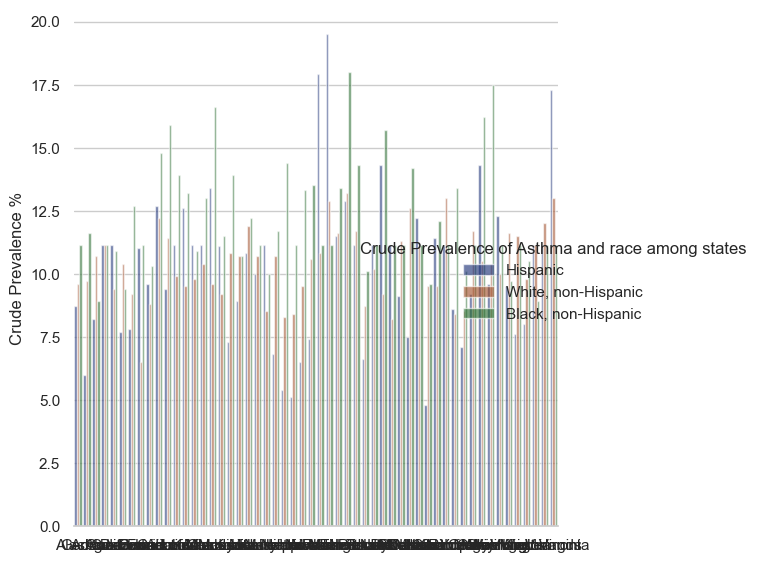

In [386]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=asthma, kind="bar",
    x="LocationDesc", y="DataValue", hue="Stratification1",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Crude Prevalence %")
g.legend.set_title("Crude Prevalence of Asthma and race among states")

### This is hard to see as it's many states, but we can see that black people seem to have higher rates, and now we'll look at the average in the country

In [388]:
# Group by Race/Ethnicity and calculate the mean of DataValue
mean_by_race = asthma.groupby('Stratification1')['DataValue'].mean().reset_index()

mean_by_race.head()

,Stratification1,DataValue
0,"Black, non-Hispanic",12.158367
1,Hispanic,10.211135
2,"White, non-Hispanic",10.363895


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


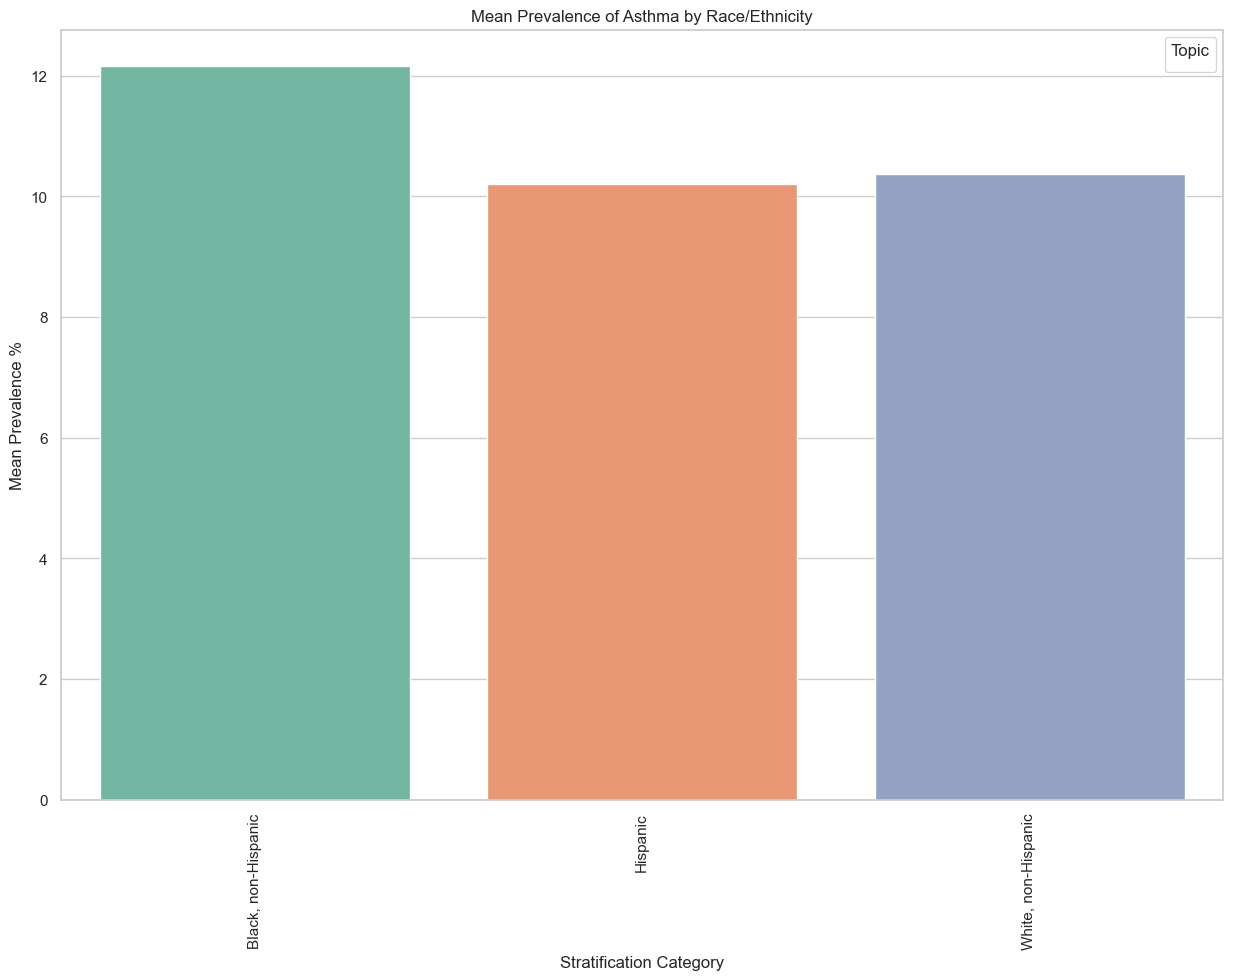

In [389]:
# Group by Race/Ethnicity and calculate the mean of DataValue
mean_by_race = asthma.groupby('Stratification1')['DataValue'].mean().reset_index()
mean_by_race['Topic'] = 'Asthma'  
# Barplot to visualize the mean prevalence of Asthma and COPD by race
plt.figure(figsize=(15, 10))

sns.barplot(x='Stratification1', y='DataValue', data=mean_by_race, palette='Set2')
plt.xticks(rotation=90)
plt.title('Mean Prevalence of Asthma by Race/Ethnicity')
plt.ylabel('Mean Prevalence %')
plt.xlabel('Stratification Category')
plt.legend(title='Topic')
plt.show()


### Crude Prevalence of COPD among race and states

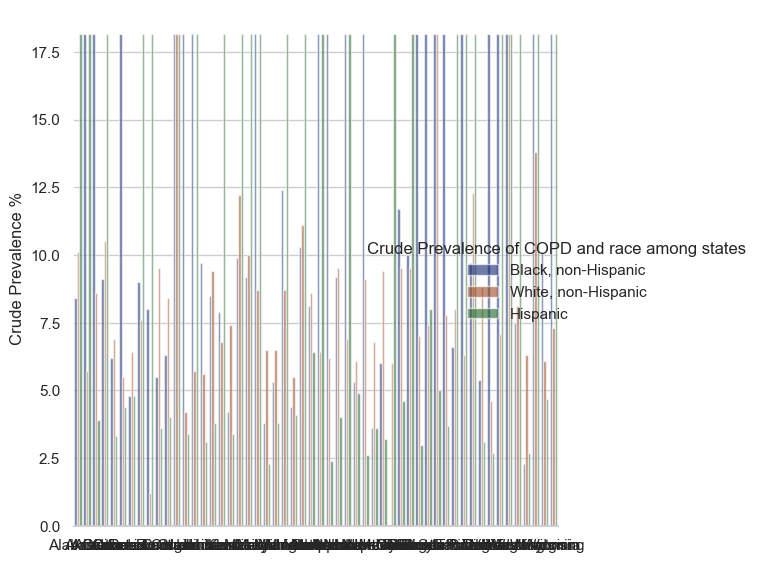

In [391]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=copd, kind="bar",
    x="LocationDesc", y="DataValue", hue="Stratification1",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Crude Prevalence %")
g.legend.set_title("Crude Prevalence of COPD and race among states")

### This is hard to see as it's many states, but we can see that black and hispanic people seem to have higher rates, and now we'll look at the average in the country

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


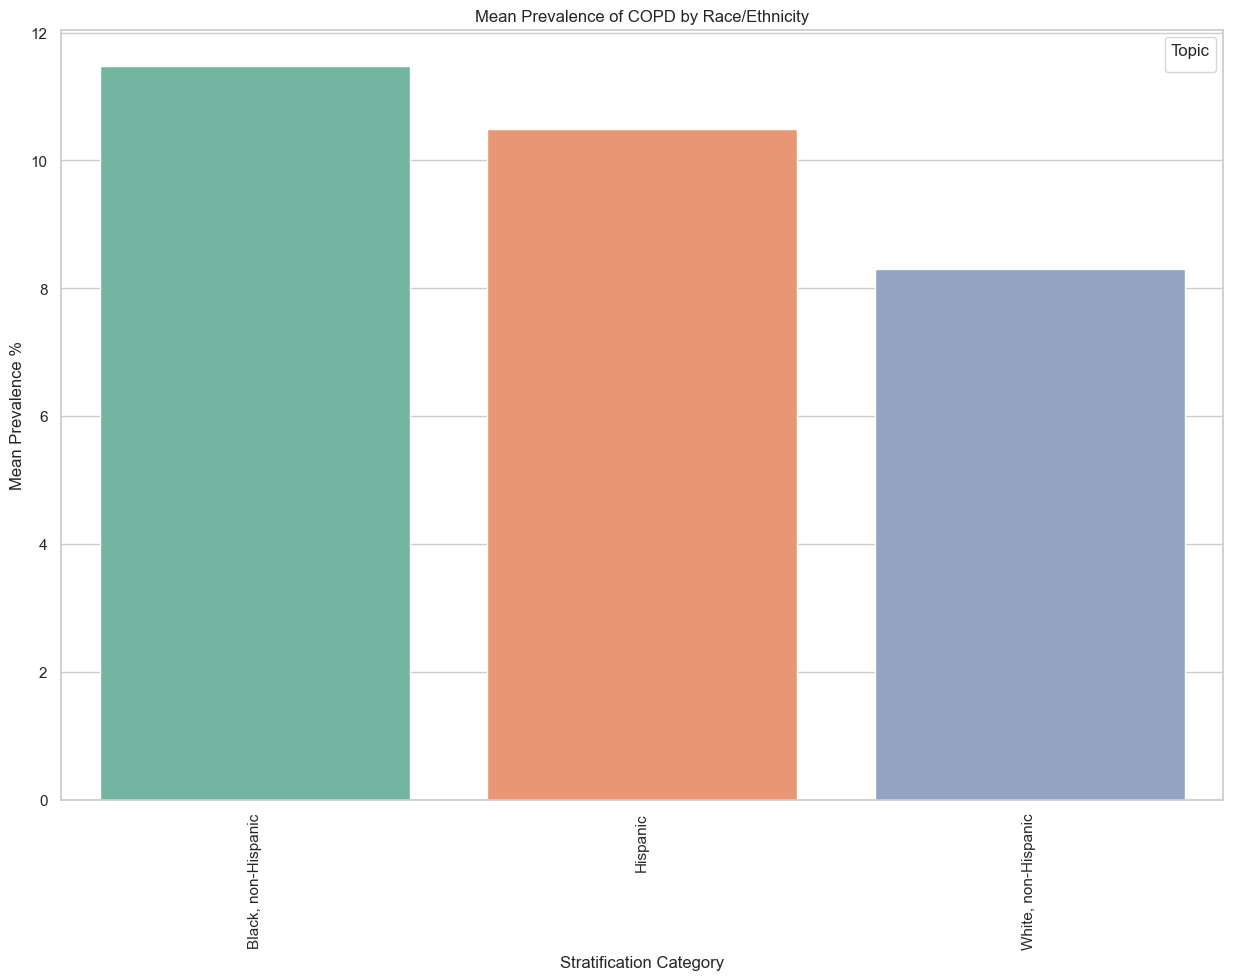

In [393]:
# Group by Race/Ethnicity and calculate the mean of DataValue
mean_by_race = copd.groupby('Stratification1')['DataValue'].mean().reset_index()
mean_by_race['Topic'] = 'COPD'  
# Barplot to visualize the mean prevalence of Asthma and COPD by race
plt.figure(figsize=(15, 10))

sns.barplot(x='Stratification1', y='DataValue', data=mean_by_race, palette='Set2')
plt.xticks(rotation=90)
plt.title('Mean Prevalence of COPD by Race/Ethnicity')
plt.ylabel('Mean Prevalence %')
plt.xlabel('Stratification Category')
plt.legend(title='Topic')
plt.show()

## Observations of the Data Set
There do seem to be slight disparities in race with COPD and Asthma in the US as in both categories Black people had noticeably higher percentages in both categories, the visualization with the states is a little difficult to look at as there are many states, but the spikes we see show some states have much higher rates of COPD and Asthma compared to other races and these spikes in different states occured more commonly within black and hispanic people.

